## This notebook is used to test weighted tensor SVD
Input data weighting has been applied in weighted_tensor function following Jones et al., J. Chemometrics 22, 482, 2008

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from tensor_svd_denoise import scree_plots, tensor_svd_denoise, weighted_tensor
import time

In [2]:
# Load noisy data and noiseless truth
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/SiDislocation/'
data_noisy = sio.loadmat(path + 'Simulation_noisy_SiDisl_slice_5_10000FPS_cropped_100layers.mat')
data_noisy = data_noisy['datacube'].astype('float')
data_truth = np.load(path + 'Simulation_truth_SiDisl_slice_5_10000FPS_cropped_100layers.npy')

In [3]:
# weight the input noisy data by calling the weighted_tensor function
# Input: noisy tensor
# Output: weighted noisy tensor, weight tensor
data_noisy_weighted, weights = weighted_tensor(data_noisy)

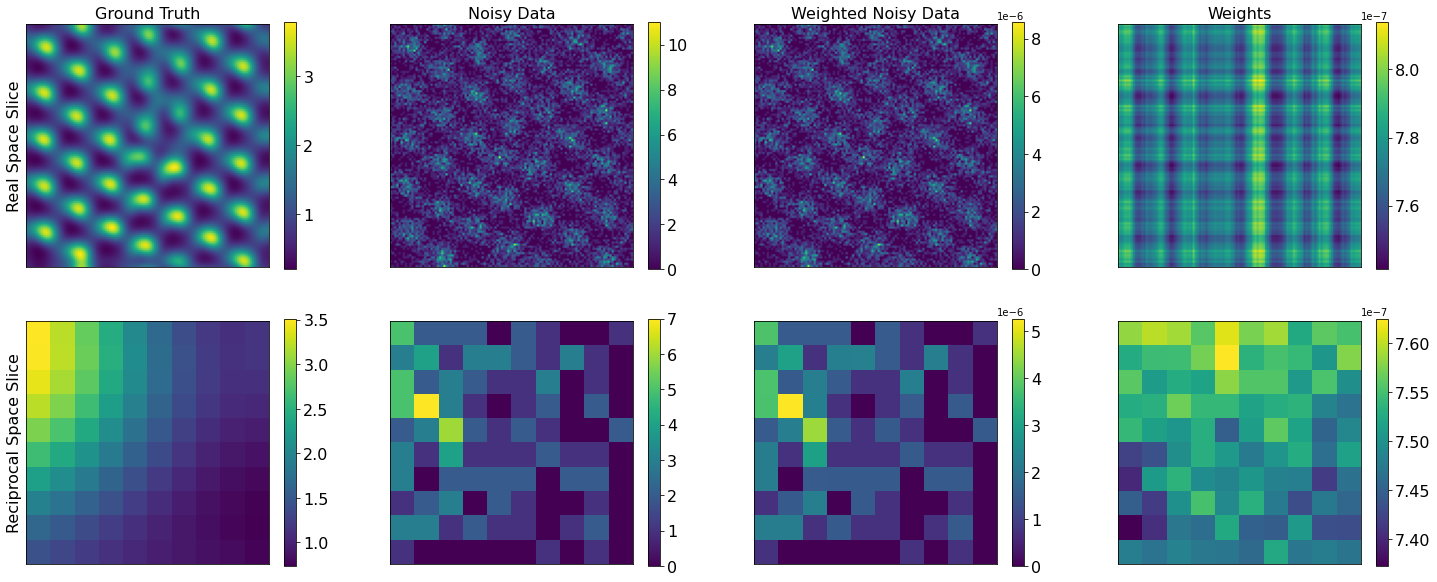

In [4]:
# Plot real space slice and reciprocal space slice from noisy data and ground truth
fig = plt.figure(figsize=(25,10))

plt.subplot(241)
plt.imshow(data_truth[:,:,10])
plt.title('Ground Truth',fontsize = 16)
plt.ylabel('Real Space Slice', fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(242)
plt.imshow(data_noisy[:,:,10])
plt.title('Noisy Data',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(243)
plt.imshow(data_noisy_weighted[:,:,10])
plt.title('Weighted Noisy Data',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(244)
plt.imshow(weights[:,:,10])
plt.title('Weights',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(245)
plt.imshow(data_truth[10,10,:].reshape(10,10))
plt.ylabel('Reciprocal Space Slice', fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(246)
plt.imshow(data_noisy[10,10,:].reshape(10,10))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(247)
plt.imshow(data_noisy_weighted[10,10,:].reshape(10,10))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(248)
plt.imshow(weights[10,10,:].reshape(10,10))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.show()

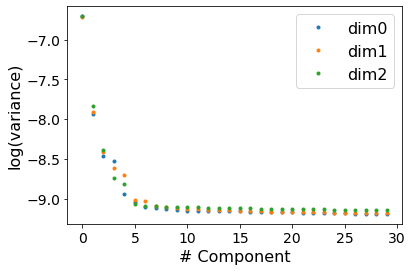

In [61]:
# Define the number of components that will be returned from scree_plots function, if ndim is not defined, ncomponents along
# each dimension will be set to the full size of that dimension
ndim = [100,100,100]
scree = scree_plots(data_noisy_weighted,ndim)

# Plot the first 30 components along each dimension in log scale

for i in range(len(scree)):
    plt.plot(np.log(scree[i][0:30]),'.',linewidth = 4, label = 'dim' + str(i))
plt.legend(fontsize=16)
plt.xlabel('# Component', fontsize=16)
plt.ylabel('log(variance)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [15]:
# Call tensor SVD using pre-determined ranks and a timer
rank = [15,15,8]
rank = [6,6,6]
# Unweighting the tensor SVD denoised data.
data_denoised_weighted = tensor_svd_denoise(data_noisy_weighted, rank)
data_denoised_weighted = np.multiply(data_denoised_weighted, 1/weights)
data_denoised = tensor_svd_denoise(data_noisy, rank)
print('SVD finished.')

SVD finished.


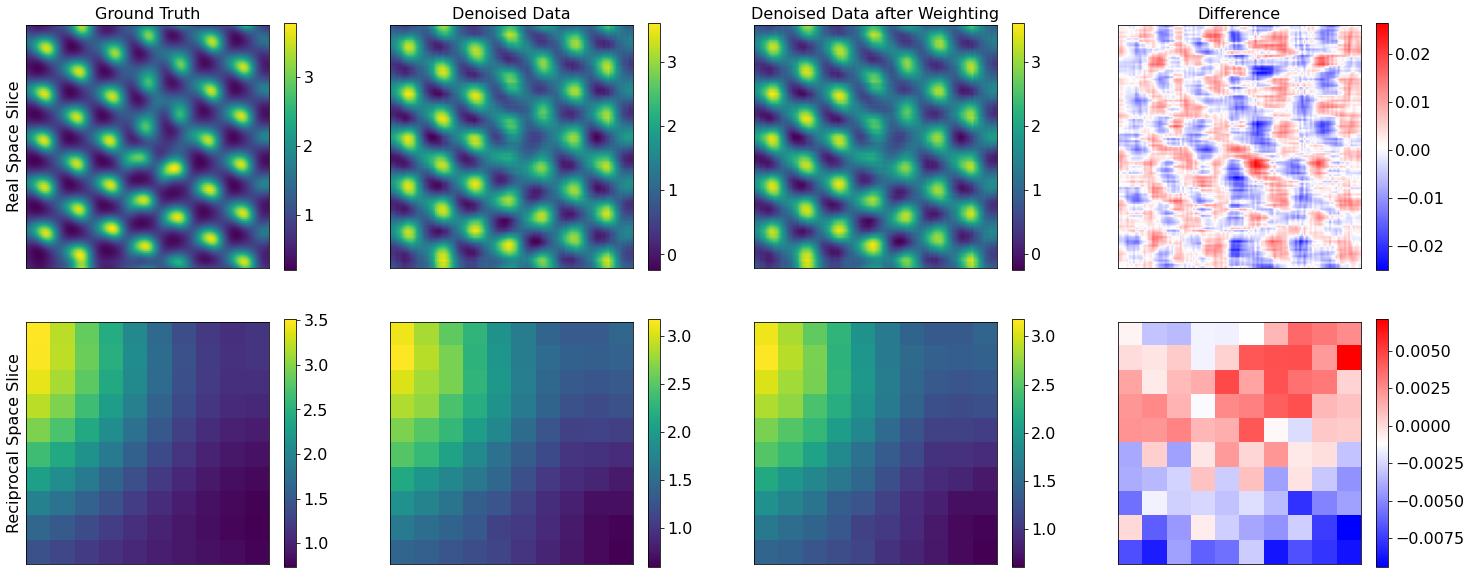

In [42]:
# Plot real space slice and reciprocal space slice from noisy data and ground truth
fig = plt.figure(figsize=(25,10))

plt.subplot(241)
plt.imshow(data_truth[:,:,10])
plt.title('Ground Truth',fontsize = 16)
plt.ylabel('Real Space Slice', fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(242)
plt.imshow(data_denoised[:,:,10])
plt.title('Denoised Data',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(243)
plt.imshow(data_denoised_weighted[:,:,10])
plt.title('Denoised Data after Weighting',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(244)
plt.imshow(data_denoised[:,:,10] - data_denoised_weighted[:,:,10], cmap='bwr')
plt.title('Difference',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(245)
plt.imshow(data_truth[10,10,:].reshape(10,10))
plt.ylabel('Reciprocal Space Slice', fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(246)
plt.imshow(data_denoised[10,10,:].reshape(10,10))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(247)
plt.imshow(data_denoised_weighted[10,10,:].reshape(10,10))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(248)
plt.imshow(data_denoised[10,10,:].reshape(10,10) - data_denoised_weighted[10,10,:].reshape(10,10), cmap='bwr')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.show()

## Conclusion on atomic resolution 4D STEM data
1. For atomic resolution 4D STEM data, the weighting option does not change the final result much.
2. Possible reason: the weighting scheme using the product of mean value along each dimension does not work well for this specific data set.
3. Maybe use iterative method to generate weight tensor?

## Test whether weighted tensor SVD and Matlab ver of weighted PCA generate the same weighted matrix
Compared the weighting script to the matlab version weighted PCA using 2D matrix.
<br>Difference between the weighted results are very small, mostly from round-off error.
<br>The weighted results from directly using 3D tensor and using reshaped 2D matrix would be different, by about 10-15% for this dataset.

In [2]:
# read the test data and weighting using python function
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/SiDislocation/'
data_noisy = sio.loadmat(path + 'Simulation_noisy_SiDisl_slice_5_10000FPS_cropped_100layers.mat')
data_noisy = data_noisy['datacube'].astype('float')
# Reshape the 3D tensor into 2D matrix, in the same way as the matlab code does.
# data_noisy = np.reshape(data_noisy,[114*114,100])
data_noisy_weighted, weights = weighted_tensor(data_noisy)
# data_noisy_weighted = np.reshape(data_noisy_weighted,[114,114,100])

FileNotFoundError: [Errno 2] No such file or directory: 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/SiDislocation/Simulation_noisy_SiDisl_slice_5_10000FPS_cropped_100layers.mat'

In [20]:
# read the weighted data from Matlab code
# The data is a 3D tensor, but was weighted as a 2D matrix then reshaped back to 3D tensor.
path = 'D:/2020 Cornell/Tensor SVD improvment/Weighted tensor SVD/'
data_noisy_weighted_2 = sio.loadmat(path + 'weightedTensor_matlab.mat')
data_noisy_weighted_2 = data_noisy_weighted_2['SI']

([], <a list of 0 Text major ticklabel objects>)

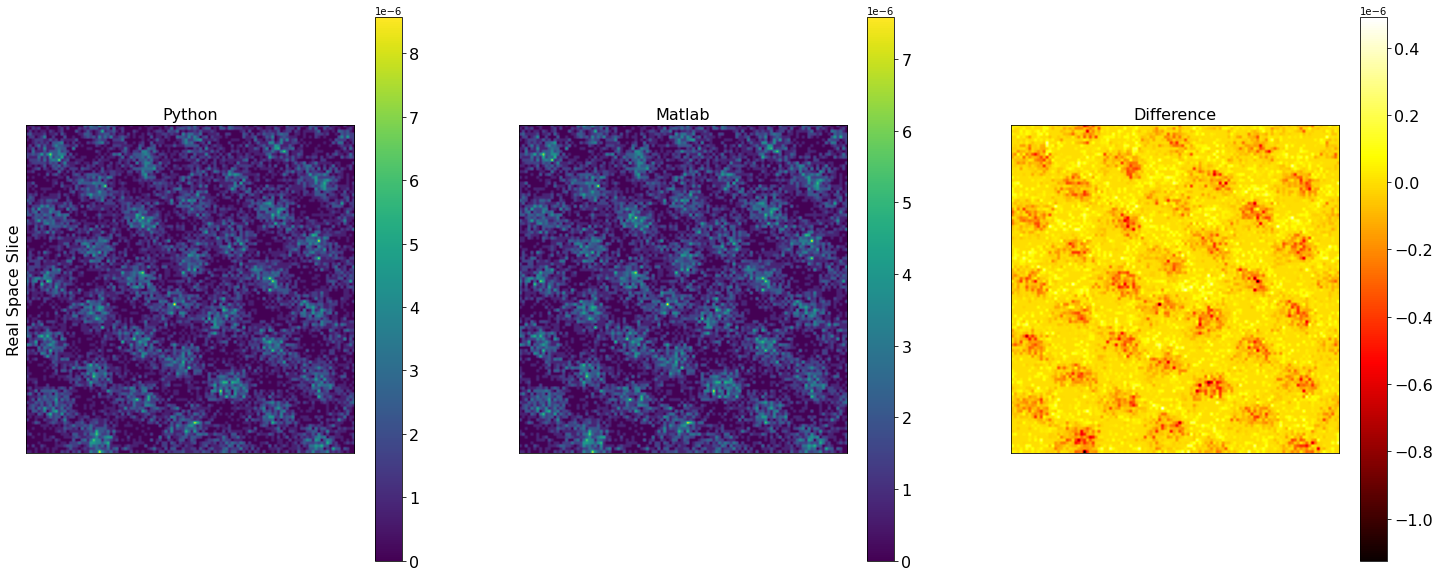

In [23]:
fig = plt.figure(figsize=(25,10))

plt.subplot(131)
plt.imshow(data_noisy_weighted[:,:,10])
plt.title('Python',fontsize = 16)
plt.ylabel('Real Space Slice', fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(data_noisy_weighted_2[:,:,10])
plt.title('Matlab',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow((data_noisy_weighted_2[:,:,10] - data_noisy_weighted[:,:,10]), cmap='hot')
plt.title('Difference',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

## Test weighted PCA on experimental EDS data
Used the EDS data from Zhaslan.

In [2]:
import hyperspy.api as hs

In [3]:
# read in the .rpl file and its associated .raw file with hyperspy
path = '/srv/home/chenyu/Service/EDS/102220/EDX/condition1/'
s = hs.load(path + "Scan1 Datacube.rpl")
data = np.asarray(s)

In [4]:
sio.savemat(path + 'Scan1 Datacube.mat', {'data':data})

In [5]:
# add a constant background to avoid all-zero entries
data_bg = data + 0.1
data_bg_weighted, weights = weighted_tensor(data_bg)

(2048, 512, 512)


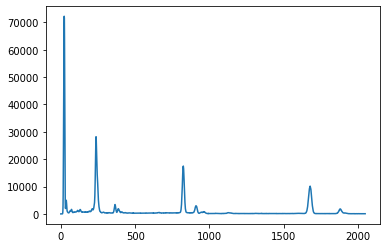

In [6]:
plt.plot(np.sum(np.sum(data,axis=1),axis=1))
print(data.shape)

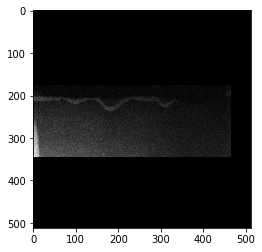

In [7]:
plt.imshow(np.sum(data,axis=0))

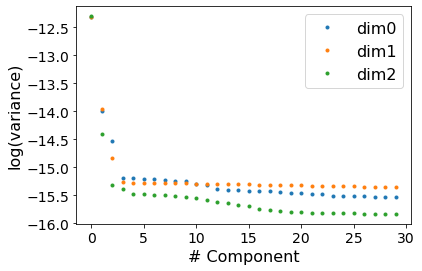

In [8]:
# Define the number of components that will be returned from scree_plots function, if ndim is not defined, ncomponents along
# each dimension will be set to the full size of that dimension
ndim = [100,100,100]
scree = scree_plots(data_bg_weighted,ndim)

# Plot the first 30 components along each dimension in log scale

for i in range(len(scree)):
    plt.plot(np.log(scree[i][0:30]),'.',linewidth = 4, label = 'dim' + str(i))
plt.legend(fontsize=16)
plt.xlabel('# Component', fontsize=16)
plt.ylabel('log(variance)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [27]:
data_bg_weighted.shape

(2048, 512, 512)

In [33]:
rank = [7,10,21]
# Unweighting the tensor SVD denoised data.
data_bg_weighted_denoised = tensor_svd_denoise(data_bg_weighted, rank)
data_bg_weighted_denoised = np.multiply(data_bg_weighted_denoised, 1/weights)
data_bg_denoised = tensor_svd_denoise(data_bg, rank)
# data_denoised = tensor_svd_denoise(data_noisy, rank) 
print('SVD finished.')

SVD finished.


Text(0.5, 1.0, '19 Components')

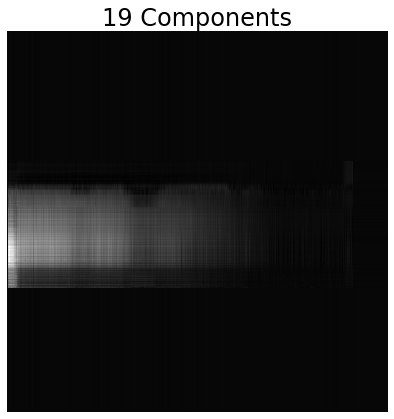

In [34]:
fig = plt.figure(figsize=(7,7))
plt.imshow(np.sum(data_bg_weighted_denoised[320:420,:,:],axis=0))
plt.axis('off')
plt.title('19 Components',fontsize=24)

Text(0.5, 1.0, 'Weighted tensor SVD denoised')

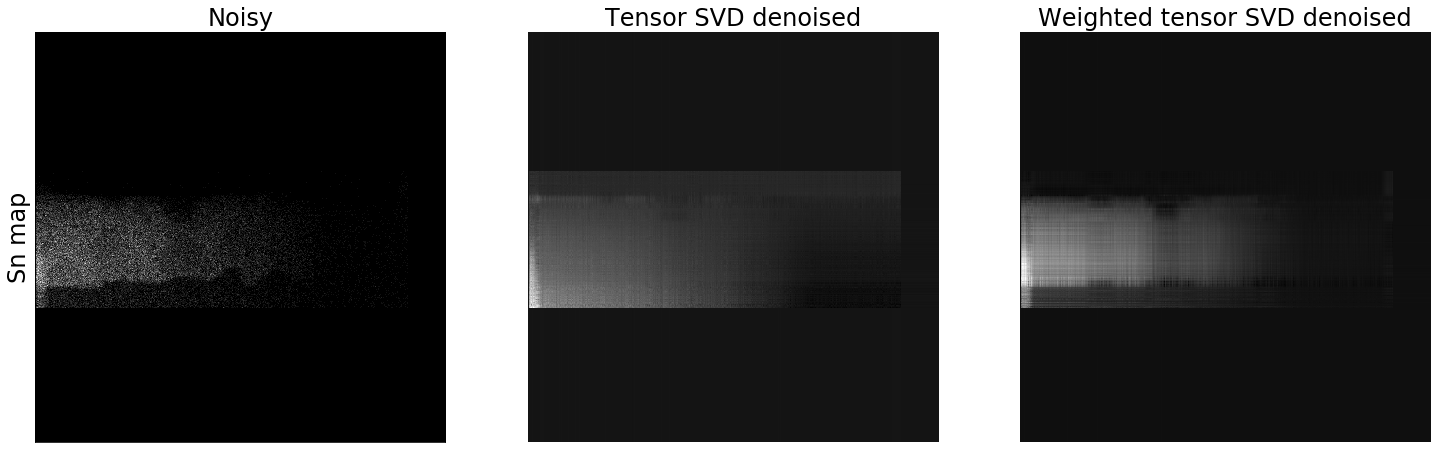

In [13]:
fig = plt.figure(figsize=(25,10))

plt.subplot(131)
plt.imshow(np.sum(data[320:420,:,:],axis=0))
plt.xticks([])
plt.yticks([])
plt.title('Noisy',fontsize=24)
plt.ylabel('Sn map',fontsize=24)

plt.subplot(132)
plt.imshow(np.sum(data_bg_denoised[320:420,:,:], axis=0))
plt.axis('off')
plt.title('Tensor SVD denoised',fontsize=24)

plt.subplot(133)
plt.imshow(np.sum(data_bg_weighted_denoised[320:420,:,:],axis=0))
plt.axis('off')
plt.title('Weighted tensor SVD denoised',fontsize=24)

Text(0.5, 1.0, 'Weighted tensor SVD denoised')

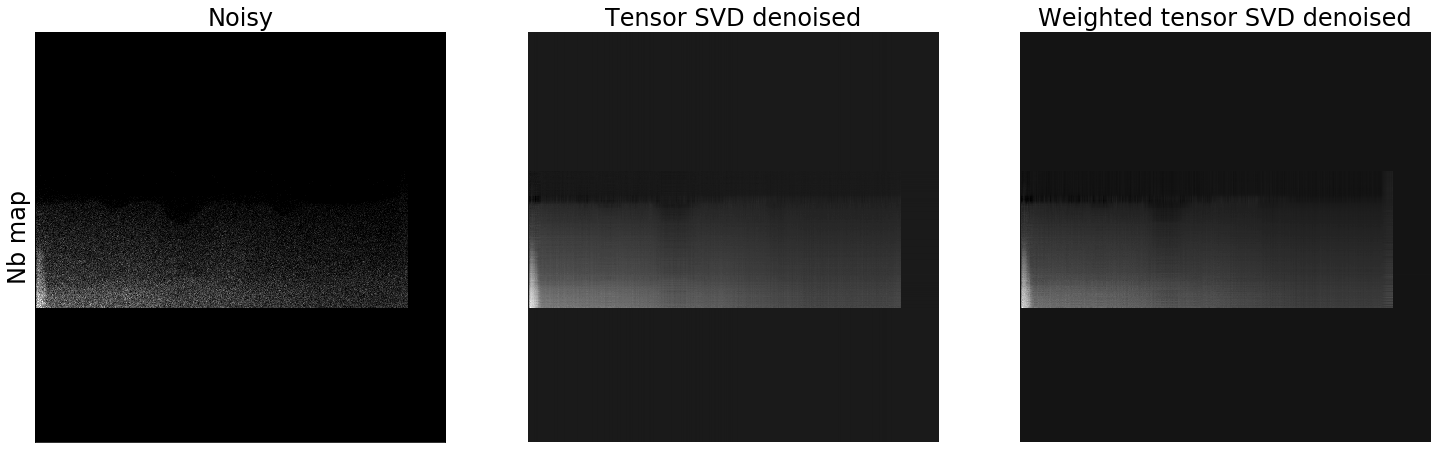

In [11]:
fig = plt.figure(figsize=(25,10))

plt.subplot(131)
plt.imshow(np.sum(data[1600:1700,:,:],axis=0))
plt.xticks([])
plt.yticks([])
plt.title('Noisy',fontsize=24)
plt.ylabel('Nb map',fontsize=24)

plt.subplot(132)
plt.imshow(np.sum(data_bg_denoised[1600:1700,:,:], axis=0))
plt.axis('off')
plt.title('Tensor SVD denoised',fontsize=24)

plt.subplot(133)
plt.imshow(np.sum(data_bg_weighted_denoised[1600:1700,:,:],axis=0))
plt.axis('off')
plt.title('Weighted tensor SVD denoised',fontsize=24)

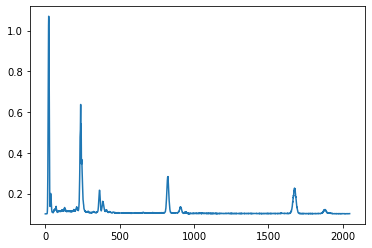

In [75]:
plt.plot(data_bg_weighted_denoised[:,250,100])
# plt.axvline(x=420)

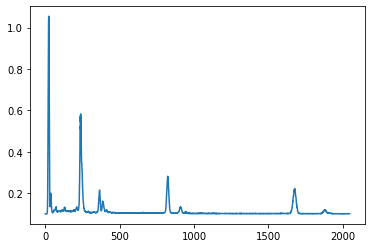

In [76]:
plt.plot(data_bg_denoised[:,250,100])

In [57]:
from PIL import Image

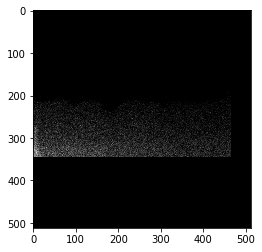

In [68]:
Sn_map = Image.open(path + 'scan1/Sn La1.tif')
Nb_map = Image.open(path + 'scan1/Nb Ka1.tif')
plt.imshow(Nb_map)

## Test on EDS data by extracting all prototypes

In [6]:
from tensor_svd_denoise import svd_HO, ttm

In [104]:
rank = [7,15,15]
[X, U, S] = svd_HO(data_bg_weighted, rank)
prototype_weighted = ttm(X,np.transpose(U[0]),0)
print(prototype_weighted.shape)

(7, 512, 512)


In [105]:
# unweighted version
rank = [7,15,15]
[X, U, S] = svd_HO(data_bg, rank)
prototype = ttm(X,np.transpose(U[0]),0)
print(prototype.shape)

(7, 512, 512)


IndexError: index 9 is out of bounds for axis 0 with size 9

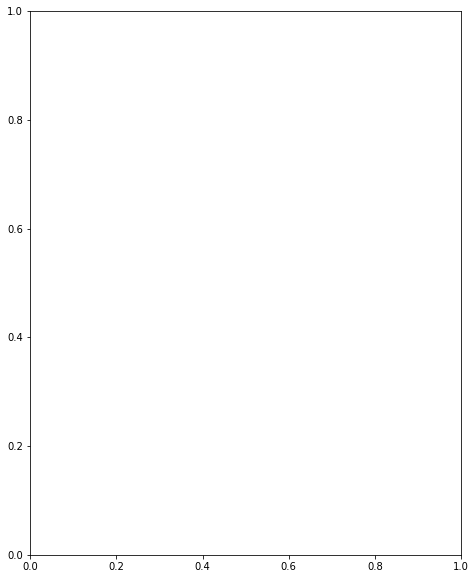

In [103]:
i = 9

fig = plt.figure(figsize=(17,10))
plt.subplot(121)
plt.imshow(prototype[i,:,:])
plt.xticks([])
plt.yticks([])
plt.title('No Weighting',fontsize=24)
plt.ylabel('Component #7',fontsize=24)

plt.subplot(122)
plt.imshow(prototype_weighted[i,:,:])
plt.axis('off')
plt.title('After Weighting',fontsize=24)